### Reading Full Economic News dataset and converting it into Global_headlines_df dataframe

In [75]:
import pandas as pd
import numpy as np

# import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [76]:
global_headlines_df = pd.read_csv("Full-Economic-News.csv", encoding = "ISO-8859-1")

In [77]:
global_headlines_df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/2015 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/1991,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/2015 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/2007,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/2015 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/1991,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/2015 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/1986,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/2015 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/2002,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [78]:
global_headlines_df.iloc[868]
#Sample apple news

_unit_id                                                         842614327
_golden                                                              False
_unit_state                                                      finalized
_trusted_judgments                                                       3
_last_judgment_at                                           12/5/2015 6:08
positivity                                                             NaN
positivity:confidence                                                  NaN
relevance                                                               no
relevance:confidence                                                     1
articleid                                                    wsj_237967207
date                                                             3/29/2010
headline                            Apple Shares Rise Ahead of iPad Launch
positivity_gold                                                        NaN
relevance_gold           

In [79]:
global_headlines_df = global_headlines_df.loc[:,['date','articleid','headline']]

In [80]:
global_headlines_df.head()

,date,articleid,headline
0,8/14/1991,wsj_398217788,Yields on CDs Fell in the Latest Week
1,8/21/2007,wsj_399019502,The Morning Brief: White House Seeks to Limit ...
2,11/14/1991,wsj_398284048,Banking Bill Negotiators Set Compromise --- Pl...
3,6/16/1986,wsj_397959018,Manager's Journal: Sniffing Out Drug Abusers I...
4,10/4/2002,wsj_398838054,Currency Trading: Dollar Remains in Tight Rang...


In [81]:
global_headlines_df.iloc[868]
#Sample apple news

date                                      3/29/2010
articleid                             wsj_237967207
headline     Apple Shares Rise Ahead of iPad Launch
Name: 868, dtype: object

In [82]:
# Convert time column in date-time format
global_headlines_df['date'] = pd.to_datetime(global_headlines_df['date'], utc=True)

### Calculating the compounder score by VADER Lexicon

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

cs = []
for row in range(len(global_headlines_df)):
    cs.append(analyzer.polarity_scores(global_headlines_df['headline'].iloc[row])['compound'])

global_headlines_df['compound_vader_score'] = cs
global_headlines_df = global_headlines_df[(global_headlines_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

global_headlines_df

,date,articleid,headline,compound_vader_score
0,1991-11-14 00:00:00+00:00,wsj_398284048,Banking Bill Negotiators Set Compromise --- Pl...,0.2960
1,1986-06-16 00:00:00+00:00,wsj_397959018,Manager's Journal: Sniffing Out Drug Abusers I...,-0.7003
2,2001-05-24 00:00:00+00:00,wsj_398739166,"Bank of Montreal, Royal Bank Profits Rose in 2...",0.4404
3,1986-10-22 00:00:00+00:00,wsj_397957465,Battle Over Medical Costs Isn't Over,-0.3818
4,2005-12-08 00:00:00+00:00,wsj_399004010,"Dow Falls 45.95, Late GM Surge Stanches Losses",-0.4019
...,...,...,...,...
4841,1960-10-08 00:00:00+00:00,wapo_141184715,Stocks Rise for Third Straight Session: Better...,0.7579
4842,1952-02-11 00:00:00+00:00,wapo_152454634,"Sawyer Sees Strong Economy For 2 Years, Truce ...",0.5106
4843,2009-12-13 00:00:00+00:00,wapo_410349039,Oil's losses are airlines' gains,-0.0772
4844,2009-12-18 00:00:00+00:00,wapo_410346237,Full Senate to vote on Bernanke; PANEL ADVANCE...,-0.3612


In [84]:
# Converts dataframe into a downloadable csv
global_headlines_df.to_csv('global_headlines_df.csv')

### Extracting Tech Stocks specifically FAANG

In [85]:
# global_headlines_df
global_headlines_df_corrected = pd.read_csv("global_headlines_df.csv", encoding = "ISO-8859-1", chunksize=10000)

# Create empty lists
fb_data = []
aapl_data = []
amzn_data = []
nflx_data = []
goog_data = []
msft_data = []
csco_data = []
orcl_data = []

In [86]:
type(global_headlines_df_corrected)

pandas.io.parsers.TextFileReader

for df in global_headlines_df_corrected:
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.headline.str.contains('apple', case=False))|(df.headline.str.contains('AAPL', case=False))]
    # Append the data into the empty aapl_data created
    aapl_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('amazon', case=False))|(df.headline.str.contains('AMZN', case=False))]
    # Append the data into the empty amzn_data created
    amzn_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('microsoft', case=False))|(df.headline.str.contains('MSFT', case=False))]
    # Append the data into the empty msft_data created
    msft_data.append(data)
    
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.headline.str.contains('google', case=False))|(df.headline.str.contains('GOOG', case=False))]
    # Append the data into the empty aapl_data created
    goog_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('cisco', case=False))|(df.headline.str.contains('CSCO', case=False))]
    # Append the data into the empty amzn_data created
    csco_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('oracle', case=False))|(df.headline.str.contains('ORCL', case=False))]
    # Append the data into the empty msft_data created
    orcl_data.append(data)
    
     # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('facebook', case=False))|(df.headline.str.contains('FB', case=False))]
    # Append the data into the empty amzn_data created
    csco_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('netflix', case=False))|(df.headline.str.contains('NFLX', case=False))]
    # Append the data into the empty msft_data created
    orcl_data.append(data)

In [87]:
for df in global_headlines_df_corrected:
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.headline.str.contains('facebook', case=False))|(df.headline.str.contains('FB', case=False))]
    # Append the data into the empty aapl_data created
    fb_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('apple', case=False))|(df.headline.str.contains('AAPL', case=False))]
    # Append the data into the empty amzn_data created
    aapl_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('amazon', case=False))|(df.headline.str.contains('AMZN', case=False))]
    # Append the data into the empty msft_data created
    amzn_data.append(data)
    
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.headline.str.contains('netflix', case=False))|(df.headline.str.contains('NFLX', case=False))]
    # Append the data into the empty aapl_data created
    nflx_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('google', case=False))|(df.headline.str.contains('GOOG', case=False))]
    # Append the data into the empty amzn_data created
    goog_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('microsoft', case=False))|(df.headline.str.contains('MSFT', case=False))]
    # Append the data into the empty msft_data created
    msft_data.append(data)
    
     # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('cisco', case=False))|(df.headline.str.contains('CSCO', case=False))]
    # Append the data into the empty amzn_data created
    csco_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('oracle', case=False))|(df.headline.str.contains('ORCL', case=False))]
    # Append the data into the empty msft_data created
    orcl_data.append(data)

### Facebook

In [88]:
fb_data

[      Unnamed: 0                       date        articleid  \
 99            99  2012-08-17 00:00:00+00:00   wsj_1033786353   
 235          235  2013-04-24 00:00:00+00:00   wsj_1338076013   
 289          289  2011-10-06 00:00:00+00:00    wsj_896375093   
 554          554  2013-10-28 00:00:00+00:00   wsj_1445876626   
 1428        1428  2012-05-15 00:00:00+00:00   wsj_1013602460   
 1955        1955  2012-08-18 00:00:00+00:00   wsj_1034504951   
 3601        3601  1996-09-23 00:00:00+00:00  wapo_1034075080   
 4709        4709  2004-04-25 00:00:00+00:00   wapo_409625065   
 
                                                headline  compound_vader_score  
 99                         Facebook Awaits Index 'Like'                0.0772  
 235         Nasdaq Aims to Pay Up In SEC Facebook Probe               -0.1027  
 289                    Fever Breaks for Facebook Shares                0.2960  
 554   Valuing Twitter vs. Facebook; Which IPO Is the...                0.3400  
 1428   

### Amazon

In [89]:
amzn_data

[     Unnamed: 0                       date      articleid  \
 744         744  2000-07-26 00:00:00+00:00  wsj_398780819   
 
                                          headline  compound_vader_score  
 744  Joe Galli Quits Amazon to Be VerticalNet CEO                0.1779  ]

### APPLE

In [90]:
aapl_data

[      Unnamed: 0                       date       articleid  \
 521          521  2006-04-07 00:00:00+00:00   wsj_398930204   
 547          547  2010-03-29 00:00:00+00:00   wsj_237967207   
 1009        1009  1991-02-19 00:00:00+00:00   wsj_398216821   
 1127        1127  1996-02-14 00:00:00+00:00   wsj_398478666   
 1144        1144  2007-08-16 00:00:00+00:00   wsj_399105391   
 1927        1927  2005-01-25 00:00:00+00:00   wsj_398903824   
 4023        4023  1992-03-09 00:00:00+00:00  wapo_140597381   
 
                                                headline  compound_vader_score  
 521   Merck Shares Weigh on Blue Chips; Industrials,...                0.2960  
 547              Apple Shares Rise Ahead of iPad Launch                0.2960  
 1009  Hard Times for Big Apple Real Estate --- Comme...               -0.1027  
 1127          Apple suspends its dividend due to losses               -0.4019  
 1144  Apple's iWork Package Is Elegant but Wimpy Com...               -0.0772  


### NETFLIX

In [91]:
nflx_data

[Empty DataFrame
 Columns: [Unnamed: 0, date, articleid, headline, compound_vader_score]
 Index: []]

### GOOGLE

In [92]:
goog_data

[      Unnamed: 0                       date       articleid  \
 11            11  2010-04-14 00:00:00+00:00   wsj_237984569   
 337          337  2006-03-10 00:00:00+00:00   wsj_398937927   
 776          776  2004-10-13 00:00:00+00:00   wsj_398885043   
 1655        1655  2006-03-03 00:00:00+00:00   wsj_398936792   
 2150        2150  2007-01-13 00:00:00+00:00   wsj_398993972   
 2305        2305  2004-11-17 00:00:00+00:00   wsj_398954099   
 3309        3309  2004-08-24 00:00:00+00:00  wapo_409677659   
 3938        3938  2007-03-07 00:00:00+00:00  wapo_410209719   
 
                                                headline  compound_vader_score  
 11    Tech Sector in Hiring Drive; Google, Intel Add...                0.4767  
 337   Google, Broadcom Slump; GM Rises; Nasdaq Falls...                0.2960  
 776   Yahoo Profit More Than Triples; 4th-Quarter Fo...                0.8979  
 1655   Google Shares Rise as Company Reassures Analysts                0.5719  
 2150  Exxon Mobi

### MICROSOFT

In [93]:
msft_data

[      Unnamed: 0                       date       articleid  \
 137          137  2010-07-15 00:00:00+00:00   wsj_609546500   
 246          246  2000-02-10 00:00:00+00:00   wsj_398704161   
 630          630  2000-06-07 00:00:00+00:00   wsj_398781031   
 1735        1735  2013-07-18 00:00:00+00:00  wsj_1400845094   
 1869        1869  1999-08-25 00:00:00+00:00   wsj_398711106   
 2877        2877  2008-05-06 00:00:00+00:00  wapo_410263307   
 3938        3938  2007-03-07 00:00:00+00:00  wapo_410209719   
 
                                                headline  compound_vader_score  
 137   Large Stock Focus: Microsoft, Cisco, H-P Intel...                0.5267  
 246   Stocks Fall Across Board as Tech Issues Such a...                0.4588  
 630   Microsoft Investors Worry About `Conduct Remed...               -0.4404  
 1735  Microsoft Earnings: Another Big Miss; Surface ...               -0.1531  
 1869  Microsoft and Other Tech Stocks Post Gains Aft...                0.3400  


### CISCO

In [94]:
csco_data

[      Unnamed: 0                       date       articleid  \
 65            65  2006-08-10 00:00:00+00:00   wsj_399011767   
 137          137  2010-07-15 00:00:00+00:00   wsj_609546500   
 702          702  1998-01-09 00:00:00+00:00   wsj_398637155   
 1154        1154  2012-05-30 00:00:00+00:00  wsj_1017695033   
 1696        1696  2001-02-08 00:00:00+00:00   wsj_398786091   
 
                                                headline  compound_vader_score  
 65    Cisco and Charles River Soar; Hospira, Toll Br...               -0.5994  
 137   Large Stock Focus: Microsoft, Cisco, H-P Intel...                0.5267  
 702   Home Price Forecast '98: Booming Economy Boost...                0.3182  
 1154  San Francisco--Silicon Valley North; City and ...                0.4215  
 1696  Techs Take Hit Alongside Cisco; Clorox, P&G, Q...                0.5267  ]

### ORACLE

In [95]:
orcl_data

[      Unnamed: 0                       date       articleid  \
 43            43  2014-08-06 00:00:00+00:00  wsj_1551511676   
 72            72  2006-09-21 00:00:00+00:00   wsj_398961634   
 682          682  2006-12-20 00:00:00+00:00   wsj_399045670   
 1279        1279  2001-06-19 00:00:00+00:00   wsj_398931822   
 
                                                headline  compound_vader_score  
 43    Planning 'Oracle' Robert Yaro to Retire from R...                0.3612  
 72    Oracle Jumps 11% on Strong Growth; Circuit Cit...                0.8625  
 682   Circuit City, Oracle Fall on Earnings; Electro...               -0.5267  
 1279  Oracle's Earnings: No Bad News Is Good --- Tec...               -0.6124  ]

In [96]:
# Concat data together
fb_data = pd.concat(fb_data)
aapl_data = pd.concat(aapl_data)
amzn_data = pd.concat(amzn_data)
goog_data = pd.concat(goog_data)
msft_data = pd.concat(msft_data)
csco_data = pd.concat(csco_data)
orcl_data = pd.concat(orcl_data)

### Facebook

In [97]:
fb_data

,Unnamed: 0,date,articleid,headline,compound_vader_score
99,99,2012-08-17 00:00:00+00:00,wsj_1033786353,Facebook Awaits Index 'Like',0.0772
235,235,2013-04-24 00:00:00+00:00,wsj_1338076013,Nasdaq Aims to Pay Up In SEC Facebook Probe,-0.1027
289,289,2011-10-06 00:00:00+00:00,wsj_896375093,Fever Breaks for Facebook Shares,0.2960
554,554,2013-10-28 00:00:00+00:00,wsj_1445876626,Valuing Twitter vs. Facebook; Which IPO Is the...,0.3400
1428,1428,2012-05-15 00:00:00+00:00,wsj_1013602460,"In Facebook IPO, Frenzy, Skepticism",-0.5106
1955,1955,2012-08-18 00:00:00+00:00,wsj_1034504951,Facebook Awaits Index 'Like',0.0772
3601,3601,1996-09-23 00:00:00+00:00,wapo_1034075080,Fed Requests Probe to Find Source of Leak: Jus...,0.6124
4709,4709,2004-04-25 00:00:00+00:00,wapo_409625065,Picking Good Financial Stocks; FBR's Ellison F...,0.6124


In [98]:
fb_data_1 = fb_data.loc[:,['headline','compound_vader_score']]

In [99]:
fb_data_1

,headline,compound_vader_score
99,Facebook Awaits Index 'Like',0.0772
235,Nasdaq Aims to Pay Up In SEC Facebook Probe,-0.1027
289,Fever Breaks for Facebook Shares,0.2960
554,Valuing Twitter vs. Facebook; Which IPO Is the...,0.3400
1428,"In Facebook IPO, Frenzy, Skepticism",-0.5106
1955,Facebook Awaits Index 'Like',0.0772
3601,Fed Requests Probe to Find Source of Leak: Jus...,0.6124
4709,Picking Good Financial Stocks; FBR's Ellison F...,0.6124


In [100]:
fb_data_1.loc[fb_data_1['compound_vader_score'] < 0, 'action_suggested'] = 'sell'
fb_data_1.loc[fb_data_1['compound_vader_score'] > 0, 'action_suggested'] = 'buy'

In [101]:
fb_data_1

,headline,compound_vader_score,action_suggested
99,Facebook Awaits Index 'Like',0.0772,buy
235,Nasdaq Aims to Pay Up In SEC Facebook Probe,-0.1027,sell
289,Fever Breaks for Facebook Shares,0.2960,buy
554,Valuing Twitter vs. Facebook; Which IPO Is the...,0.3400,buy
1428,"In Facebook IPO, Frenzy, Skepticism",-0.5106,sell
1955,Facebook Awaits Index 'Like',0.0772,buy
3601,Fed Requests Probe to Find Source of Leak: Jus...,0.6124,buy
4709,Picking Good Financial Stocks; FBR's Ellison F...,0.6124,buy


In [103]:
fb_data_1.loc[fb_data_1['compound_vader_score'] < 0, 'sentiment_class'] = 'Negative'
fb_data_1.loc[fb_data_1['compound_vader_score'] > 0, 'sentiment_class'] = 'Positive'

In [104]:
fb_data_1

,headline,compound_vader_score,action_suggested,sentiment_class
99,Facebook Awaits Index 'Like',0.0772,buy,Positive
235,Nasdaq Aims to Pay Up In SEC Facebook Probe,-0.1027,sell,Negative
289,Fever Breaks for Facebook Shares,0.2960,buy,Positive
554,Valuing Twitter vs. Facebook; Which IPO Is the...,0.3400,buy,Positive
1428,"In Facebook IPO, Frenzy, Skepticism",-0.5106,sell,Negative
1955,Facebook Awaits Index 'Like',0.0772,buy,Positive
3601,Fed Requests Probe to Find Source of Leak: Jus...,0.6124,buy,Positive
4709,Picking Good Financial Stocks; FBR's Ellison F...,0.6124,buy,Positive


In [106]:
fb_data_2 = fb_data_1.loc[:,['sentiment_class','compound_vader_score']]

In [107]:
fb_data_2

,sentiment_class,compound_vader_score
99,Positive,0.0772
235,Negative,-0.1027
289,Positive,0.2960
554,Positive,0.3400
1428,Negative,-0.5106
1955,Positive,0.0772
3601,Positive,0.6124
4709,Positive,0.6124


In [108]:
import matplotlib.pyplot as plt

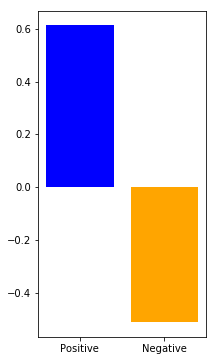

In [111]:
plt.figure(figsize=(3, 6))

plt.bar(fb_data_2['sentiment_class'], fb_data_2['compound_vader_score'], color=['orange','blue'])
plt.show()

In [113]:
fb_data_1

,headline,compound_vader_score,action_suggested,sentiment_class
99,Facebook Awaits Index 'Like',0.0772,buy,Positive
235,Nasdaq Aims to Pay Up In SEC Facebook Probe,-0.1027,sell,Negative
289,Fever Breaks for Facebook Shares,0.2960,buy,Positive
554,Valuing Twitter vs. Facebook; Which IPO Is the...,0.3400,buy,Positive
1428,"In Facebook IPO, Frenzy, Skepticism",-0.5106,sell,Negative
1955,Facebook Awaits Index 'Like',0.0772,buy,Positive
3601,Fed Requests Probe to Find Source of Leak: Jus...,0.6124,buy,Positive
4709,Picking Good Financial Stocks; FBR's Ellison F...,0.6124,buy,Positive


In [114]:
fb_data_3 = fb_data_1.loc[:,['action_suggested','compound_vader_score']]

In [115]:
fb_data_3

,action_suggested,compound_vader_score
99,buy,0.0772
235,sell,-0.1027
289,buy,0.2960
554,buy,0.3400
1428,sell,-0.5106
1955,buy,0.0772
3601,buy,0.6124
4709,buy,0.6124


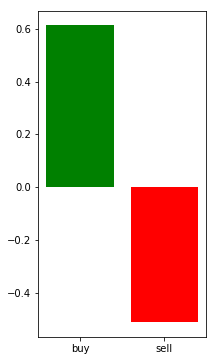

In [118]:
plt.figure(figsize=(3, 6))

plt.bar(fb_data_3['action_suggested'], fb_data_2['compound_vader_score'], color=['red','green'])
plt.show()

In [119]:
Tech_capitalization_B = pd.read_csv("Tech Companies market capitalization (billions).csv")

In [120]:
Tech_capitalization_B

,Name,Market Cap(Billions)
0,Cisco,$190.40
1,Oracle,$190.83
2,Netflix,$225.49
3,Facebook,$762.11
4,Tesla,$834.17


In [ ]:
msft_data

In [ ]:
aapl_data

In [124]:
goog_data

,Unnamed: 0,date,articleid,headline,compound_vader_score
11,11,2010-04-14 00:00:00+00:00,wsj_237984569,"Tech Sector in Hiring Drive; Google, Intel Add...",0.4767
337,337,2006-03-10 00:00:00+00:00,wsj_398937927,"Google, Broadcom Slump; GM Rises; Nasdaq Falls...",0.2960
776,776,2004-10-13 00:00:00+00:00,wsj_398885043,Yahoo Profit More Than Triples; 4th-Quarter Fo...,0.8979
1655,1655,2006-03-03 00:00:00+00:00,wsj_398936792,Google Shares Rise as Company Reassures Analysts,0.5719
2150,2150,2007-01-13 00:00:00+00:00,wsj_398993972,Exxon Mobil Gain Helps Boost Blue Chips to Ano...,0.9186
2305,2305,2004-11-17 00:00:00+00:00,wsj_398954099,Google Drops 6.7% as Investors Are Freed to Se...,0.4019
3309,3309,2004-08-24 00:00:00+00:00,wapo_409677659,IPO's Success Doesn't Justify Google's Price,0.5719
3938,3938,2007-03-07 00:00:00+00:00,wapo_410209719,Microsoft Attacks Google Over Book Search,-0.4404


In [ ]:
# Create empty lists
goog_data = []
csco_data = []
orcl_data = []

In [ ]:
for df in global_headlines_df_corrected:
    # Select the headlines with the word 'apple' or 'aapl'
    data = df.loc[(df.headline.str.contains('google', case=False))|(df.headline.str.contains('GOOG', case=False))]
    # Append the data into the empty aapl_data created
    goog_data.append(data)

    # Select the headlines with the word 'amazon' or 'amzn'
    data = df.loc[(df.headline.str.contains('cisco', case=False))|(df.headline.str.contains('CSCO', case=False))]
    # Append the data into the empty amzn_data created
    csco_data.append(data)

    # Select the headlines with the word 'microsoft' or 'msft'
    data = df.loc[(df.headline.str.contains('oracle', case=False))|(df.headline.str.contains('ORCL', case=False))]
    # Append the data into the empty msft_data created
    orcl_data.append(data)

In [ ]:
csco_data

### First we calculated the compound score and sentiment class on the dataframe, then we extracted the Tech companies alongwith their compound scores and sentiment class, afterwhich we computed action suggested of buy and sell depending on the compound score. 
